<a href="https://colab.research.google.com/github/jcmachicao/gestion_sistemasinestables/blob/master/cpx_matrix_factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factorización Matricial para Gestión de Atributos de Exito
Elaborado por: José Carlos Machicao (GestioDinámica) <br>
Fecha de Actualización: Agosto 2021


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

* R: Matriz de calificación (puede estar incompleta)
* P: |U| * K (Usuarios con determinadas habilidades)
* Q: |D| * K (Objetos que requieren determinadas habilidades)
* K: Habilidades (caracteristicas)
* steps: iteraciones
* alpha: learning rate (recomendable 0.0002)
* beta: regularization parameter (recomendable 0.02)

## Funciones

In [ ]:
#@title Función de Factorización Matricial
def matrix_factorization(R, P, Q, K, steps, alpha=0.0002, beta=0.02):

  err = []

  Q = Q.T

  for step in range(steps):
    for i in range(len(R)):
      for j in range(len(R[i])):
        if R[i][j] > 0:
          # calculate error
          eij = R[i][j] - np.dot(P[i,:],Q[:,j])
          for k in range(K):
            # calculate gradient with a and beta parameter
            P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
            Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

      eR = np.dot(P,Q)

      e = 0

      for i in range(len(R)):
        for j in range(len(R[i])):
          if R[i][j] > 0:
            e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
            for k in range(K):
              e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
      # 0.001: local minimum
      err.append(e)
      if e < 0.001:
        break

  return P, Q.T, err

In [ ]:
#@title Función de Dibujo de Matriz
def dibuja_matriz(Mx, colorx):
  plt.figure(figsize=(5,5))
  plt.imshow(Mx, cmap=colorx)
  plt.colorbar()
  plt.show()

## Proceso

In [ ]:
R = np.array([
     [5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4],
     [2,1,3,0],
    ], dtype='float32')

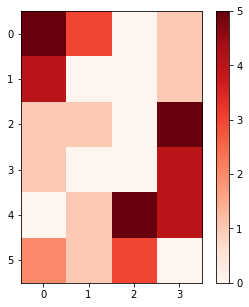

In [ ]:
dibuja_matriz(R, 'Reds')

In [ ]:
R = np.array(R) 
N = len(R) # N: número de usuarios
M = len(R[0]) # M: nímero de objetos
K = 3 # número de atributos

In [ ]:
P = np.random.rand(N,K)
Q = np.random.rand(M,K)

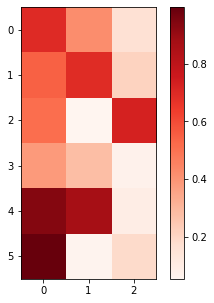

In [ ]:
dibuja_matriz(P, 'Reds')

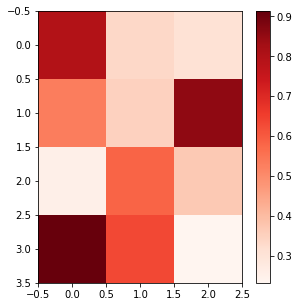

In [ ]:
dibuja_matriz(Q, 'Reds')

In [ ]:
nP, nQ, err = matrix_factorization(R, P, Q, K, steps=2000)
nR = np.dot(nP, nQ.T)

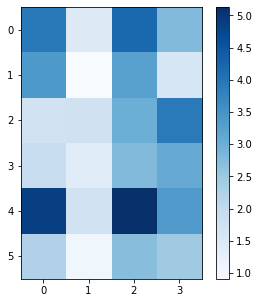

In [ ]:
dibuja_matriz(nR, 'Blues')

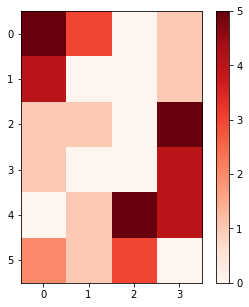

In [ ]:
dibuja_matriz(R, 'Reds')

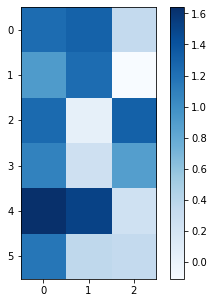

In [ ]:
dibuja_matriz(nP, 'Blues')

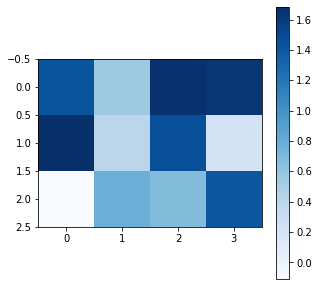

In [ ]:
dibuja_matriz(nQ.T, 'Blues')

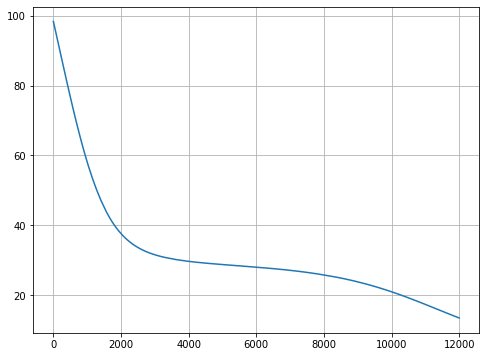

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(err)
plt.grid()
plt.show()

Fuente:

https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b

https://nbviewer.jupyter.org/github/albertauyeung/matrix-factorization-in-python/blob/master/mf.ipynb

